### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create Path
path=r'C:\online course\CH6'

In [4]:
#Importing datasets
df = pd.read_csv(os.path.join(path,'02_data','Prepared_data','Customer_Records.csv'))

## 2. Data Cleaning

In [5]:
df.head()

Unnamed: 0  CustomerID  CreditScore Geography  Gender  Age  Tenure  \
0           0    15634602          619    France  Female   42       2   
1           1    15647311          608     Spain  Female   41       1   
2           2    15619304          502    France  Female   42       8   
3           3    15701354          699    France  Female   39       1   
4           4    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Complain  Satisfaction Score Card Type  Point Earned  
0       1         1                   2   DIAMOND           464  
1       0         1                   3   DIAMOND           456  
2       1         1                   3   DIAMOND           377  
3       0         0                   5      GOLD           350  
4       0         0                   5      GOLD           425

In [6]:
#Dropping columns
df= df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head()

CustomerID  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Complain  Satisfaction Score Card Type  Point Earned  
0         1                   2   DIAMOND           464  
1         1                   3   DIAMOND           456  
2         1                   3   DIAMOND           377  
3         0                   5      GOLD           350  
4         0                   5      GOLD           425

In [8]:
# Check for missing values
df.isnull().sum()

CustomerID            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

C:\Users\j28c1\AppData\Local\Temp\ipykernel_26448\1738153158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins = 25, kde = True)


<Axes: xlabel='Age', ylabel='Density'>

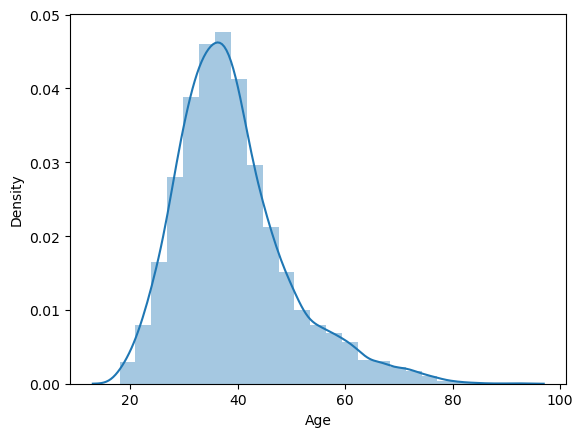

In [9]:
# Check for extreme values
sns.distplot(df['Age'],bins = 25, kde = True)

In [10]:
df['Age'].mean() # Check the mean

38.9218

In [11]:
# Check median
df['Age'].median()

37.0

In [12]:
# Check max
df['Age'].max()

92

In [13]:
# Check min
df['Age'].min()

18

In [14]:
df['Age'].max()-df['Age'].min()

74

In [15]:
df.describe()

CustomerID   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited      Complain  Satisfaction Score  Point Earned  
count  10000.000000  10000.000000        10000.000000  10000.000000  
mean       0.203800      0.204400            3.013800    606.515100  
std        0.402842      0.403283            1.405919    225.924839  
min        0.000000      0.000000            1.000000    119.000000  
25%        0.000000      0.000000            2.000000    410.000000  
50%        0.000000      0.000000            3.000000    605.000000  
75%        0.000000      0.000000            4.000000    801.000000  
max        1.000000      1.000000            5.000000   1000.000000

## 3.Data prep for regression analysis

## Hypothesis 1: If a customer has more complain,they will be more possible to leave the bank.
## Hypothesis 2: As customers' age increases, their balance tends to be higher.


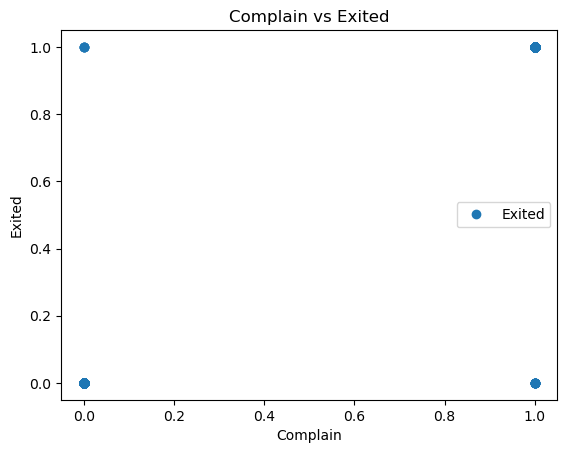

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Complain', y='Exited',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Complain vs Exited')  
plt.xlabel('Complain')  
plt.ylabel('Exited')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Complain'].values.reshape(-1,1)
y = df['Exited'].values.reshape(-1,1)

In [18]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [19]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [20]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

## LogisticRegression Analysis

In [64]:
# Create a regression object.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  # Regression object, which will be fit onto the training set.

In [65]:
# Fit the regression to the training set of each variable.  This trains the model.
logreg.fit(X_train, y_train)

C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
# Predict the values of y using X.

y_predicted = logreg.predict(X_test)

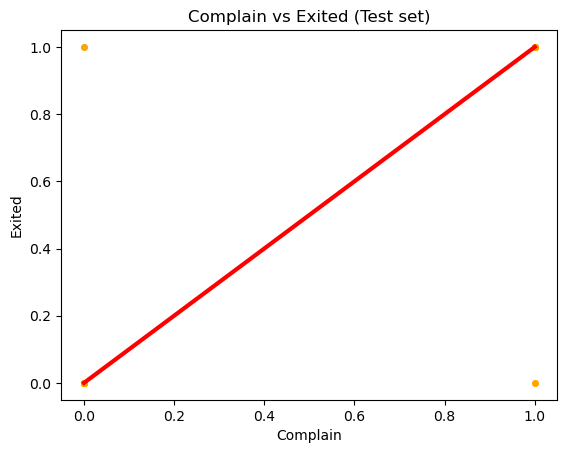

In [67]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Complain vs Exited (Test set)')
plot_test.xlabel('Complain')
plot_test.ylabel('Exited')
plot_test.show()

In [68]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[275.48830685]]
Mean squared error:  0.0013333333333333333
R2 score:  0.9918870460464223


### Partial Interpretation

The line shows a good fit .Mean squared error is 0.001, it's small, and it is clear that the data points are near the trend line.R2 score is 0.99, it's good!(where values closer to 1 indicate a good fit).Indicating we have a linear relationship between the variables.

### Compare how the regression fits the training set

In [76]:
# Predict on the training set
y_predicted_train = logreg.predict(X_train) # This is predicting X_train!

In [77]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [78]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[275.48830685]]
Mean squared error:  0.0014285714285714286
R2 score:  0.9911470221617859


In [73]:
y_predicted

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [79]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        0          0
1        1          1
2        0          0
3        0          0
4        0          0
5        1          1
6        0          0
7        0          0
8        1          1
9        1          1
10       0          0
11       0          0
12       0          0
13       0          0
14       1          1
15       1          1
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0

### Compare how the regression fits the training set

In [80]:
# Predict.

y_predicted_train = logreg.predict(X_train) # This is predicting X_train!

In [81]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [82]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[275.48830685]]
Mean squared error:  0.0014285714285714286
R2 score:  0.9911470221617859


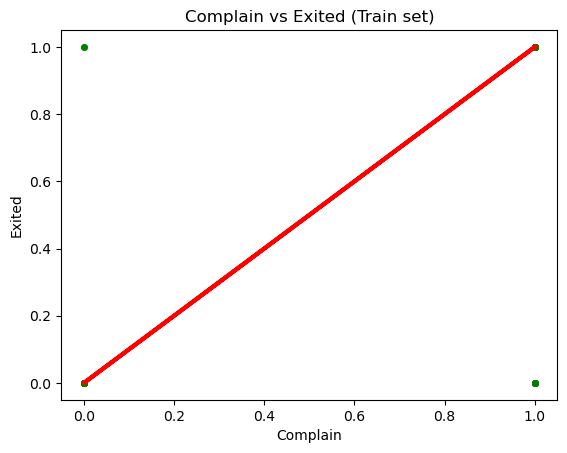

In [83]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Complain vs Exited (Train set)')
plot_test.xlabel('Complain')
plot_test.ylabel('Exited')
plot_test.show()

The performance of the model on the testing set is comparable to that on the training set, but the mean squared error (MSE) is even lower on the testing set. This suggests that the model generalize well to new,it is a reliable model to use.

These results indicate that the complain score is the main driving factor for customer churn. 

## Hypothesis 2: As customers' EstimatedSalary' increases, their balance tends to be higher.

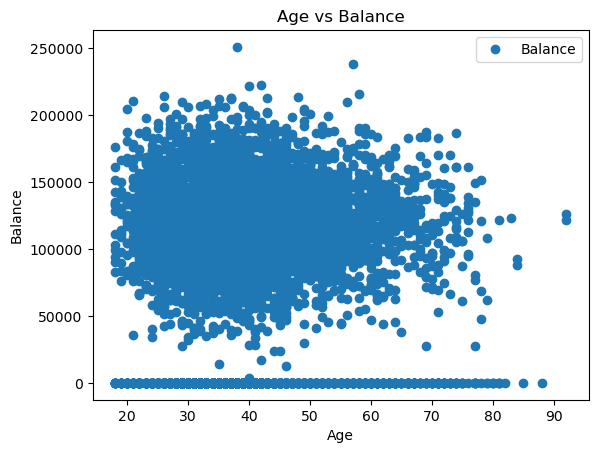

In [94]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Age', y='Balance',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Balance')  
plt.xlabel('Age')  
plt.ylabel('Balance')  
plt.show()

In [97]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Age'].values.reshape(-1,1)
y = df['Balance'].values.reshape(-1,1)

In [98]:
X

array([[42],
       [41],
       [42],
       ...,
       [36],
       [42],
       [28]], dtype=int64)

In [99]:
y

array([[     0.  ],
       [ 83807.86],
       [159660.8 ],
       ...,
       [     0.  ],
       [ 75075.31],
       [130142.79]])

In [100]:
# Split data into a training set and a test set.  Using test_train_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size = 0.3,random_state = 0)

## Regression Analysis

In [101]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.
regression.fit(X_train2, y_train2)# Fit the regression object onto the training set.

LinearRegression()

In [102]:
# Predict the values of y using X.

y_predicted2 = regression.predict(X_test2)

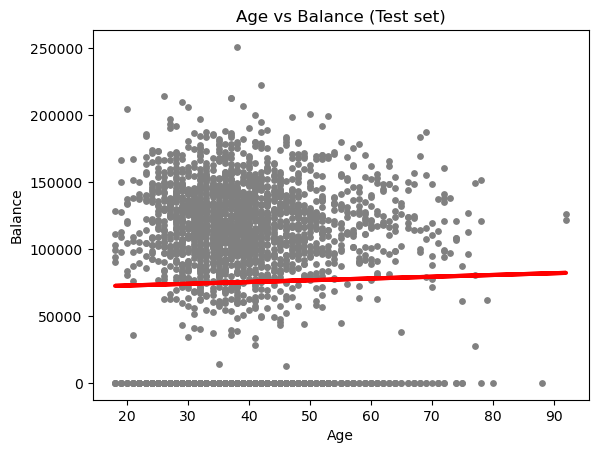

In [103]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test2, y_test2, color='gray', s = 15)
plot_test.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test.title('Age vs Balance (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Balance')
plot_test.show()

In [104]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test2, y_predicted2)
r2 = r2_score(y_test2, y_predicted2)

In [105]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[131.16916101]]
Mean squared error:  3808471970.674507
R2 score:  -0.0033202783853127915


In [108]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_predicted2.flatten()})
data.head(30)

Actual     Predicted
0   131101.04  74703.805965
1   102967.41  75359.651770
2    95386.82  75621.990092
3   112079.58  74310.298482
4   163034.82  75097.313448
5   175575.95  77589.527507
6    65812.35  74572.636804
7   157576.47  73916.790999
8        0.00  78507.711634
9   165350.61  78376.542473
10       0.00  74179.129321
11  150900.29  76015.497575
12  140002.35  74441.467643
13  117153.00  74179.129321
14  143930.92  76802.512541
15  154393.43  77327.189185
16       0.00  75753.159253
17  115654.47  78770.049956
18  107879.04  74047.960160
19       0.00  76015.497575
20  115930.87  75621.990092
21       0.00  74703.805965
22       0.00  74572.636804
23  144318.97  74572.636804
24       0.00  74703.805965
25  183276.32  76146.666736
26  166930.76  73916.790999
27   77168.87  74047.960160
28       0.00  73916.790999
29  123322.15  75884.328414

### Partial Interpretation
The line is not a good fit. Mean squared error is 3808471970, it's too big, and it is clear that the data points are far from the trend line.R2 score is -0.0033, it's bad!(where values closer to 0 indicate not a good fit).Indicating we didn't have a linear relationship between the variables.


### Compare how the regression fits the training set

In [109]:
# Predict.

y_predicted_train2 = regression.predict(X_train2)

In [110]:
rmse2 = mean_squared_error(y_train2, y_predicted_train2)
r2_2 = r2_score(y_train2, y_predicted_train2)

In [111]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[131.16916101]]
Mean squared error:  3927350131.3133597
R2 score:  0.00047702180062314525


### Partial Interpretation
The line is not a good fit. Mean squared error is 3927350131, it's too big, and it is clear that the data points are far from the trend line.R2 score is 0.0004, it's bad!(where values closer to 0 indicate not a good fit).Indicating we didn't have a linear relationship between the variables.We can speculate that there might be other factors contributing to these results.

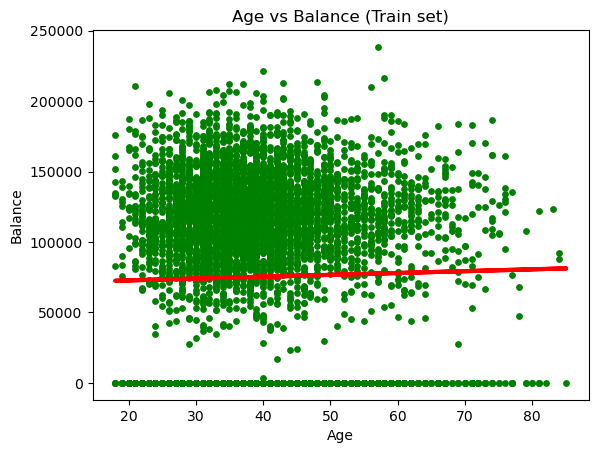

In [112]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train2, y_train2, color='green', s = 15)
plot_test.plot(X_train2, y_predicted_train2, color='red', linewidth =3)
plot_test.title('Age vs Balance (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Balance')
plot_test.show()

#performance improvement after removing outliers

## Modification of the Model

#### To drop the out filer ,Try on balance bigger than 0, 18<=Age<=50

In [113]:
df2 = df[(df['Age'] <= 50) & (df['Age'] >= 18)]

In [114]:
df2.head()

CustomerID  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Complain  Satisfaction Score Card Type  Point Earned  
0         1                   2   DIAMOND           464  
1         1                   3   DIAMOND           456  
2         1                   3   DIAMOND           377  
3         0                   5      GOLD           350  
4         0                   5      GOLD           425

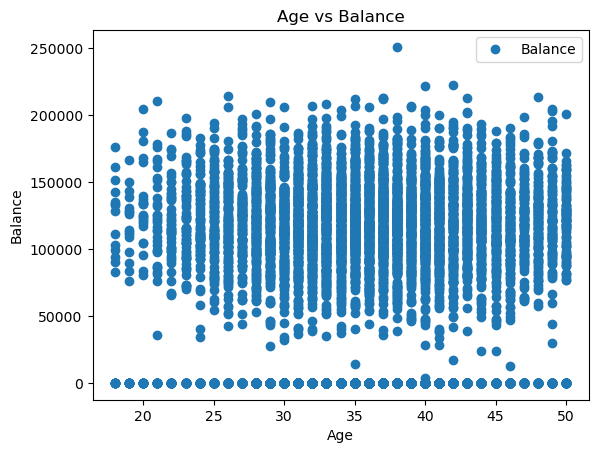

In [115]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Age', y='Balance',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Balance')  
plt.xlabel('Age')  
plt.ylabel('Balance')  
plt.show()

In [116]:
# Reshape again.

X_3 = df2['Age'].values.reshape(-1,1)
y_3 = df2['Balance'].values.reshape(-1,1)

In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [119]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [120]:
# Predict.

y_predicted2 = regression.predict(X_test2)

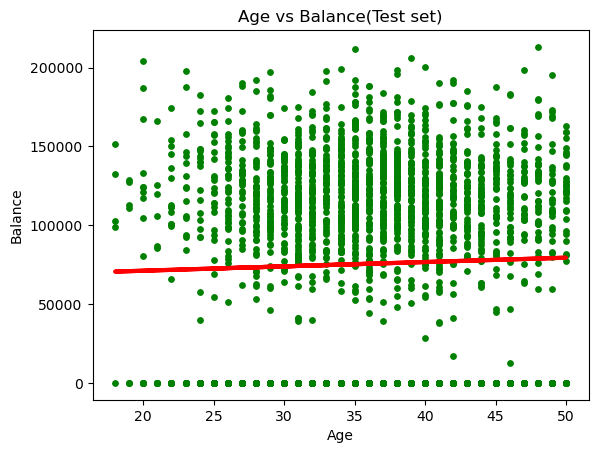

In [121]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test2, y_test2, color='green', s = 15)
plot_test.plot(X_test2, y_predicted2, color='red', linewidth =3)
plot_test.title('Age vs Balance(Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Balance')
plot_test.show()

In [122]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test2, y_predicted2)

In [123]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[275.48830685]]
Mean squared error:  3852351144.9896684
R2 score:  0.0009214868744369387


after Cleaning the extreme values from the "Age" variable observed during the consistency checks. There is still a positive relationship between the variables.  However due to the high MSE and low R2 score, this model is not viable for making predictions.